In [1]:
RCTD_dir <- "path/to/RCTD_results"
path_to_results <- "path/to/results"

In [2]:
libraries <- c("ggplot2", "Seurat", "glue", "dplyr", "anndata", "spacexr", 
               "data.table", "Matrix", "mltools", "enrichR", "R.utils")
lapply(libraries, function(x) suppressMessages(require(x, character.only = TRUE,quietly=TRUE,warn.conflicts = FALSE)))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

In [3]:
# Assumes you're working in the repository root directory
source(glue("code/RCTD.R"))
source(glue("code/utils.R"))

In [4]:
beads_df <- fread('/data2/core-genlmu/jwatter/Data/SlideCNA_mouse/beads_df.csv')

In [5]:
beads_df

V1,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,pos_x,pos_y,nCount_RNA,cluster_type,bc
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
CCAACAGATAGTGC-1,2004,3255,0,0,2175.3,5246.60,3255,Malignant,CCAACAGATAGTGC-1
TCCGCCACTAGATG-1,737,991,0,0,4276.5,4095.50,991,Malignant,TCCGCCACTAGATG-1
GTCACAATCTGACT-1,610,793,0,0,4532.4,5118.90,793,Malignant,GTCACAATCTGACT-1
CATCATAGATAGCG-1,1620,2572,0,0,3660.5,1286.50,2572,Malignant,CATCATAGATAGCG-1
GCTCCGTTAGGTGA-1,658,865,0,0,4193.4,2189.00,865,Malignant,GCTCCGTTAGGTGA-1
CTCACTTCAATGAC-1,757,1011,0,0,1261.0,3176.80,1011,Normal,CTCACTTCAATGAC-1
CACCCAGAATAGAA-1,1308,1870,0,0,2259.6,4393.60,1870,Malignant,CACCCAGAATAGAA-1
TCGGCACGCTGTAT-1,1183,1688,0,0,1256.7,2884.00,1688,Malignant,TCGGCACGCTGTAT-1
GCGCCCGCGCTAGA-1,1609,2357,0,0,4054.6,1060.10,2357,Normal,GCGCCCGCGCTAGA-1


In [6]:
library(reticulate)
#use_condaenv(condaenv = "SlideCNA_env") #if error, set conda environment manually for reticulate
so_adata <- read_h5ad("path/to/Puck.h5ad") # output from slide-seq_prep_mouse.ipynb

In [7]:
so_adata

AnnData object with n_obs × n_vars = 5577 × 16276
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'pos_x', 'pos_y', 'nCount_RNA', 'cluster_type', 'bc'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'counts'

In [9]:
rownames(so_adata$var)

[1] "0610007P14Rik"  "0610009B22Rik"  "0610009E02Rik"  "0610009L18Rik" 
    [5] "0610009O20Rik"  "0610010F05Rik"  "0610011F06Rik"  "0610030E20Rik" 
    [9] "0610037L13Rik"  "0610038B21Rik"  "0610040B10Rik"  "0610040F04Rik" 
   [13] "0610040J01Rik"  "0610043K17Rik"  "1010001B22Rik"  "1110001J03Rik" 
   [17] "1110002E22Rik"  "1110002J07Rik"  "1110002L01Rik"  "1110004E09Rik" 
   [21] "1110004F10Rik"  "1110007C09Rik"  "1110008F13Rik"  "1110008L16Rik" 
   [25] "1110008P14Rik"  "1110012L19Rik"  "1110017D15Rik"  "1110018N20Rik" 
   [29] "1110019D14Rik"  "1110020A21Rik"  "1110025M09Rik"  "1110032A03Rik" 
   [33] "1110032F04Rik"  "1110034G24Rik"  "1110035H17Rik"  "1110037F02Rik" 
   [37] "1110038B12Rik"  "1110038F14Rik"  "1110046J04Rik"  "1110051M20Rik" 
   [41] "1110059E24Rik"  "1110059G10Rik"  "1110065P20Rik"  "1190002N15Rik" 
   [45] "1190005I06Rik"  "1190007I07Rik"  "1200014J11Rik"  "1300002E11Rik" 
   [49] "1300017J02Rik"  "1500002C15Rik"  "1500002F19Rik"  "1500004A13Rik" 
   [53] "1500009C09Rik"  "1500009L16Rik"  "1500011B03Rik"  "1500011K16Rik" 
   [57] "1500012F01Rik"  "1500012K07Rik"  "1500015A07Rik"  "1500015L24Rik" 
   [61] "1500015O10Rik"  "1500017E21Rik"  "1500026H17Rik"  "1500035N22Rik" 
   [65] "1600002H07Rik"  "1600002K03Rik"  "1600010M07Rik"  "1600012H06Rik" 
   [69] "1600014C10Rik"  "1600020E01Rik"  "1700001C02Rik"  "1700001G11Rik" 
   [73] "1700001L05Rik"  "1700001L19Rik"  "1700001O22Rik"  "1700003D09Rik" 
   [77] "1700003E16Rik"  "1700003F12Rik"  "1700003M02Rik"  "1700003M07Rik" 
   [81] "1700007B14Rik"  "1700007G11Rik"  "1700007K13Rik"  "1700007L15Rik" 
   [85] "1700007P06Rik"  "1700008J07Rik"  "1700008O03Rik"  "1700010I14Rik" 
   [89] "1700010K23Rik"  "1700010K24Rik"  "1700011I03Rik"  "1700012B09Rik" 
   [93] "1700013F07Rik"  "1700016K19Rik"  "1700016P03Rik"  "1700017B05Rik" 
   [97] "1700017N19Rik"  "1700018L02Rik"  "1700019A02Rik"  "1700019D03Rik" 
  [101] "1700019G17Rik"  "1700019G24Rik"  "1700019L03Rik"  "1700020G17Rik" 
  [105] "1700020I14Rik"  "1700020L24Rik"  "1700021F05Rik"  "1700021K19Rik" 
  [109] "1700023E05Rik"  "1700023F06Rik"  "1700024G13Rik"  "1700024P16Rik" 
  [113] "1700025G04Rik"  "1700026D08Rik"  "1700026J14Rik"  "1700026L06Rik" 
  [117] "1700027A07Rik"  "1700027H10Rik"  "1700028E10Rik"  "1700028J19Rik" 
  [121] "1700028K03Rik"  "1700028P14Rik"  "1700029I15Rik"  "1700029J07Rik" 
  [125] "1700030C10Rik"  "1700030F04Rik"  "1700030J22Rik"  "1700030K09Rik" 
  [129] "1700034H15Rik"  "1700034P13Rik"  "1700037C18Rik"  "1700037H04Rik" 
  [133] "1700040D17Rik"  "1700040L02Rik"  "1700041G16Rik"  "1700047A11Rik" 
  [137] "1700047M11Rik"  "1700048O20Rik"  "1700049G17Rik"  "1700052K11Rik" 
  [141] "1700055D18Rik"  "1700056N10Rik"  "1700060O08Rik"  "1700063D05Rik" 
  [145] "1700064H15Rik"  "1700066M21Rik"  "1700084C01Rik"  "1700084C06Rik" 
  [149] "1700086L19Rik"  "1700086O06Rik"  "1700086P04Rik"  "1700088E04Rik" 
  [153] "1700093J21Rik"  "1700096K18Rik"  "1700101E01Rik"  "1700101I11Rik" 
  [157] "1700102P08Rik"  "1700109H08Rik"  "1700112D23Rik"  "1700112E06Rik" 
  [161] "1700112J16Rik"  "1700113A16Rik"  "1700113H08Rik"  "1700120C14Rik" 
  [165] "1700120G11Rik"  "1700123M08Rik"  "1700123O20Rik"  "1700123O21Rik" 
  [169] "1700124L16Rik"  "1810009A15Rik"  "1810010H24Rik"  "1810010K12Rik" 
  [173] "1810011H11Rik"  "1810011O10Rik"  "1810013L24Rik"  "1810014B01Rik" 
  [177] "1810019N24Rik"  "1810020O05Rik"  "1810021B22Rik"  "1810022K09Rik" 
  [181] "1810024B03Rik"  "1810026B05Rik"  "1810026J23Rik"  "1810030O07Rik" 
  [185] "1810032O08Rik"  "1810037I17Rik"  "1810041H14Rik"  "1810041L15Rik" 
  [189] "1810043G02Rik"  "1810043H04Rik"  "1810044D09Rik"  "1810055G02Rik" 
  [193] "1810058I24Rik"  "1810062O18Rik"  "2010001A14Rik"  "2010002M12Rik" 
  [197] "2010007H06Rik"  "2010012O05Rik"  "2010015M23Rik"  "2010107E04Rik" 
  [201] "2010107G12Rik"  "2010107G23Rik"  "2010109A12Rik"  "2010111I01Rik" 
  [205] "2010204K13Rik"  "2010300C02Rik"  "2010300F17Rik"  "2010308F09Rik" 
  [209] "2010315B03Rik"  "2010320M18Rik"  "2010320O0

In [10]:
### Get counts from adata object. Adjusted this from utils.R, since adata.uns does not serialize.
counts <- so_adata$obsm$counts %>% 
    t() %>% # transpose
    as.data.frame() %>%
    `rownames<-`(rownames(so_adata$var)) %>%
    `colnames<-`(so_adata$obs_names) %>%
    select(beads_df$bc)

In [11]:
counts_mat <- counts %>% as.data.table() %>% sparsify()
row.names(counts_mat) <- row.names(counts)
so=make_seurat_annot(counts_mat, beads_df, seed_FindClusters = 0, seed_RunTSNE = 1, seed_RunUMAP = 42)

Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  Plp1, Enpp2, Ptgds, Cnp, Apod, Dbi, Mal, Cd63, Cldn11, Trf 
	   Mbp, Mag, Tppp3, Ccdc153, 1500015O10Rik, Zic1, Calml4, Car2, Mog, Rsph1 
	   Mobp, Ermn, Sept4, Cryab, Neat1, Rarres2, Qdpr, Tmem212, Gatm, Pltp 
Negative:  Ppp3ca, Nrgn, Hpca, Chn1, Ptk2b, Gria2, Rbfox1, Wipf3, Camk2b, Olfm1 
	   Ppp3r1, Kalrn, Fam131a, Atp2b1, Enc1, Ncdn, Icam5, Dlgap1, Cnksr2, Lppr4 
	   2010300C02Rik, Grin2a, Cpne6, Itpka, Wasf1, Neurod2, Ddn, Prkce, Neurod6, Slc8a2 
PC_ 2 
Positive:  Cldn11, Mal, Mag, Mog, Cnp, Trf, Plp1, Ermn, Sept4, Mobp 
	   Tmem88b, Gatm, Mbp, Tspan2, Ndrg1, Opalin, Cryab, Ugt8a, Car2, Apod 
	   Gjc3, Gpr37, Pllp, Qdpr, Gjc2, Il33, Qk, Cntn2, Efnb3, Sox2ot 
Negative:  Ccdc153, Rsph1, Tmem212, Gm5741, Rarres2, Calml4, Ak7, Nwd2, Tac2, 1500015O10Rik 
	   Nnat, 2410004P03Rik, 1110017D15Rik, Cfap126, Pou4f1, Enkur, Fam183b, Necab2, Scube1, Dynlrb2 
	   Tm4sf1, Pltp, Calb2, Hdc, Zic4, Sncg, Ca

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 5577
Number of edges: 189692

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8659
Number of communities: 14
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
15:05:30 UMAP embedding parameters a = 0.9922 b = 1.112

15:05:30 Read 5577 rows and found 10 numeric columns

15:05:30 Using Annoy for neighbor search, n_neighbors = 30

15:05:30 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:05:31 Writing NN index file to temp file /tmp/RtmpOrm3ly/file35e1544d58747d

15:05:31 Searching Annoy index using 1 thread, search_k = 3000

15:05:32 Annoy recall = 100%

15:05:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [12]:
md=as.data.table(so@meta.data)
rownames(md) <- md$bc

OUTPUT_DIRECTORY <- file.path(path_to_results, "SlideCNA")
plotDir <- file.path(OUTPUT_DIRECTORY, "plots")
dir.create(OUTPUT_DIRECTORY)
dir.create(plotDir)

In [14]:
# Run SlideCNA
library(SlideCNA)


Attaching package: ‘SlideCNA’


The following objects are masked _by_ ‘.GlobalEnv’:

    make_seurat_annot, run_enrichr


The following object is masked from ‘package:Seurat’:

    SpatialPlot


The following object is masked from ‘package:base’:

    mode




In [15]:
so

An object of class Seurat 
16253 features across 5577 samples within 1 assay 
Active assay: RNA (16253 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, tsne, umap

In [18]:
head(md)

orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.8,seurat_clusters,V1,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,pos_x,pos_y,cluster_type,bc
<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
SeuratProject,3255,2004,0,11,11,CCAACAGATAGTGC-1,2004,3255,0,0,2175.3,5246.6,Malignant,CCAACAGATAGTGC-1
SeuratProject,991,737,0,2,2,TCCGCCACTAGATG-1,737,991,0,0,4276.5,4095.5,Malignant,TCCGCCACTAGATG-1
SeuratProject,793,610,0,7,7,GTCACAATCTGACT-1,610,793,0,0,4532.4,5118.9,Malignant,GTCACAATCTGACT-1
SeuratProject,2572,1620,0,0,0,CATCATAGATAGCG-1,1620,2572,0,0,3660.5,1286.5,Malignant,CATCATAGATAGCG-1
SeuratProject,865,658,0,1,1,GCTCCGTTAGGTGA-1,658,865,0,0,4193.4,2189.0,Malignant,GCTCCGTTAGGTGA-1
SeuratProject,1011,757,0,7,7,CTCACTTCAATGAC-1,757,1011,0,0,1261.0,3176.8,Normal,CTCACTTCAATGAC-1


In [19]:
# Read in the gene_position csv that was adapted from inferCNV
gene_pos <- fread('mouse_gencode.GRCm39.vM32.basic.annotation.by_gene_name.infercnv_positions_rel_gene_pos.csv')
gene_pos

GENE,chr,start,end,rel_gene_pos
<chr>,<chr>,<int>,<int>,<int>
4933401J01Rik,chr1,3143476,3144545,1
Gm26206,chr1,3172239,3172348,2
Xkr4,chr1,3276124,3741721,3
Gm18956,chr1,3322980,3323459,4
Gm37180,chr1,3435954,3438772,5
Gm37363,chr1,3445779,3448011,6
Gm37686,chr1,3535200,3537508,7
Gm1992,chr1,3536810,3583776,8
Gm37329,chr1,3582674,3584730,9


Warning message in `[.data.table`(new_md, , `:=`(N_bin, .N), by = bin_all):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(new_md, , `:=`(N_bin, .N), by = bin_all):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which 

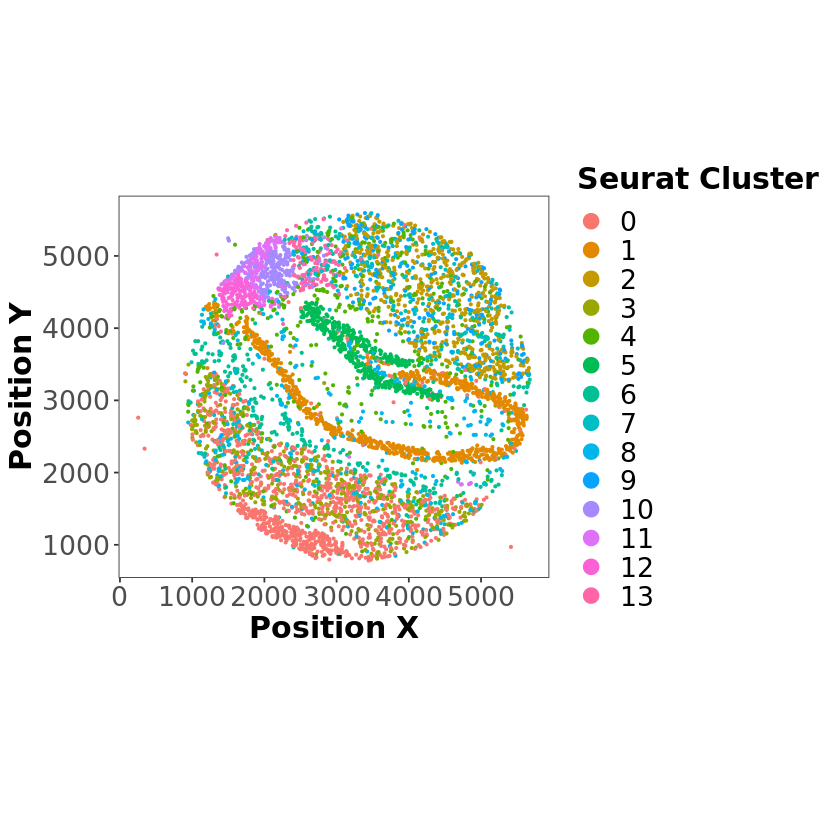

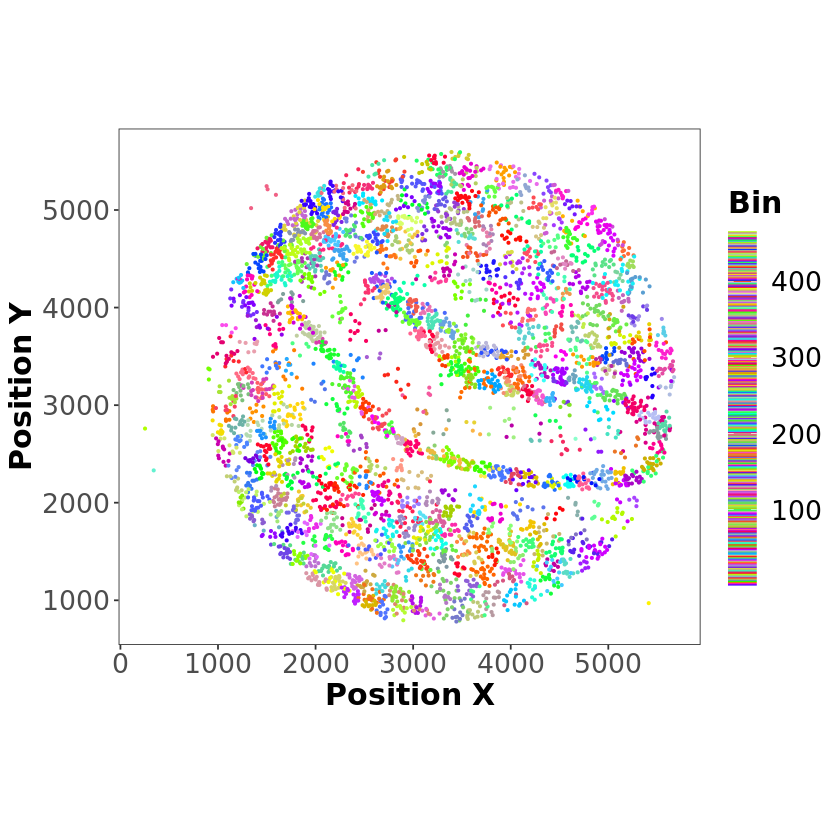

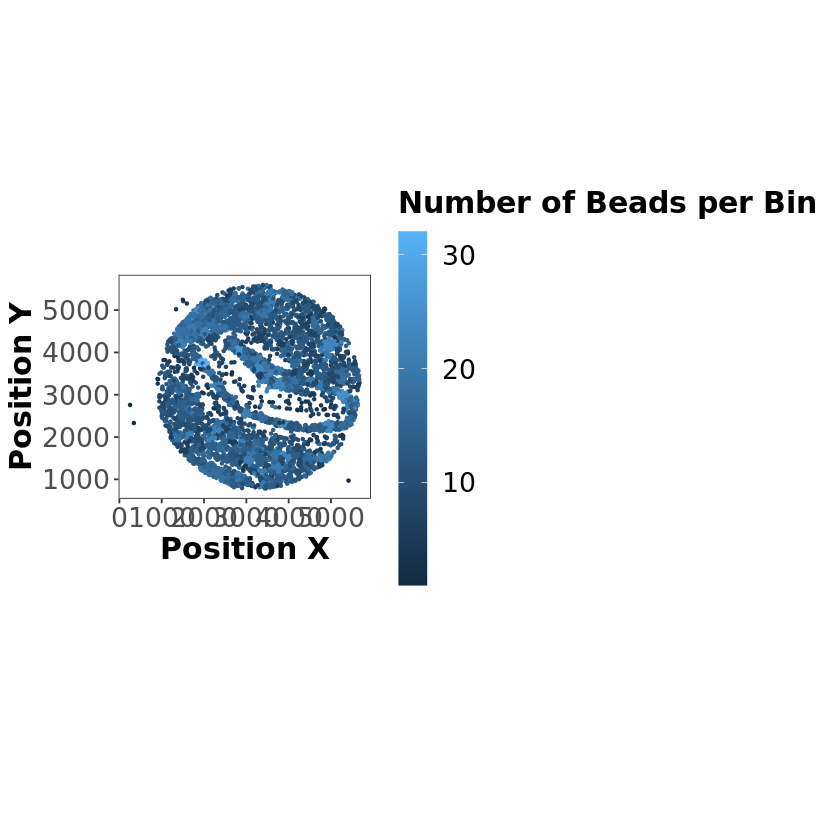

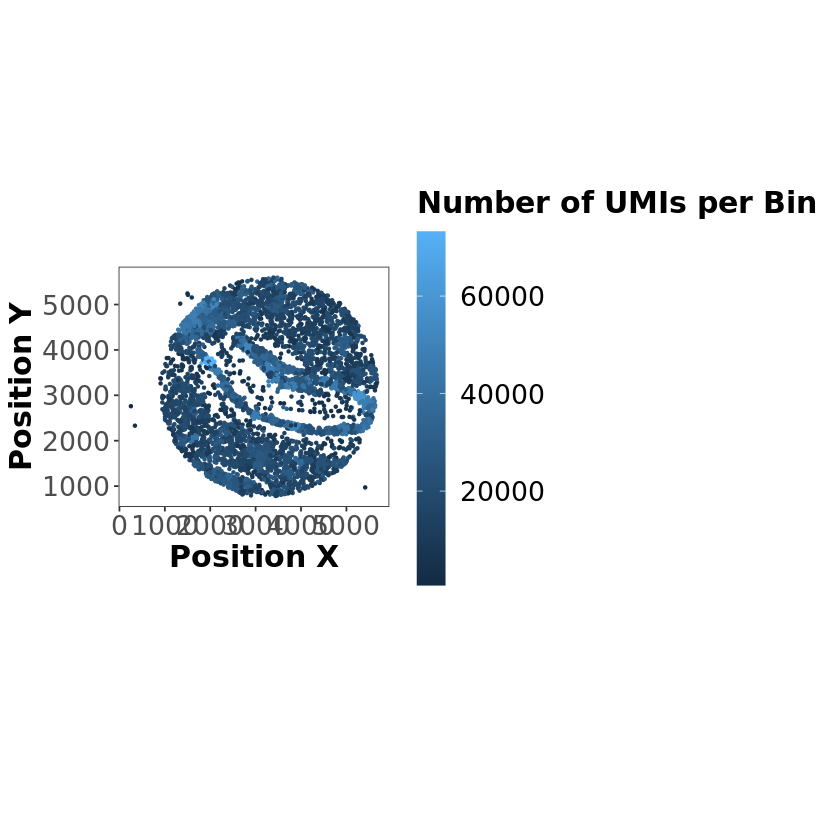

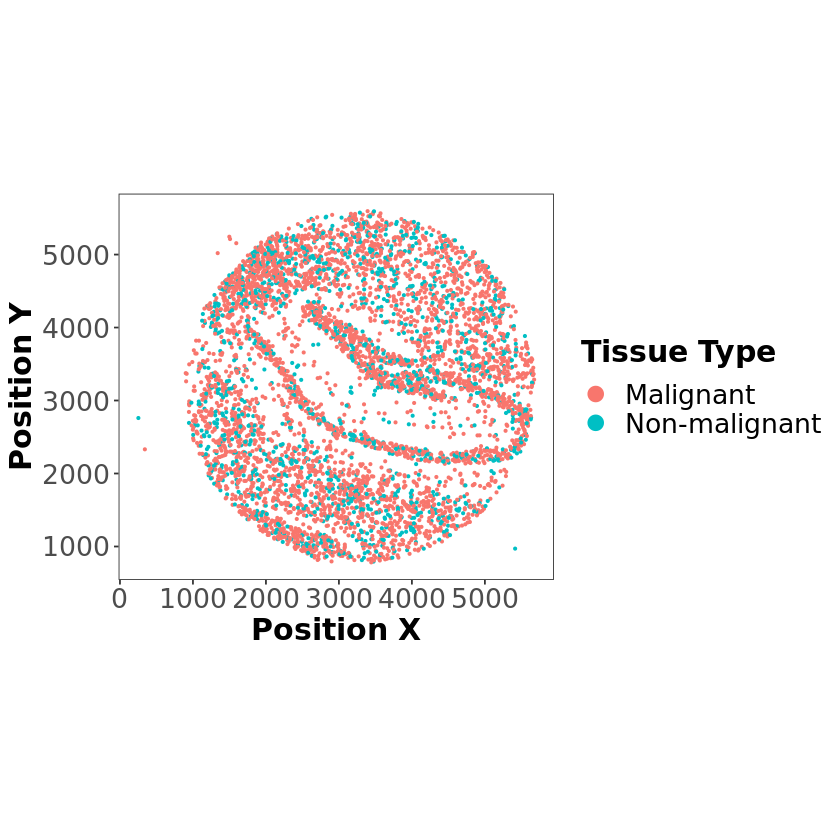

[1] "debug cnv_data, subwide"
NULL
  [1] "329" "20"  "130" "173" "39"  "410" "207" "152" "217" "40"  "361" "389"
 [13] "222" "357" "210" "68"  "131" "166" "223" "441" "315" "111" "308" "138"
 [25] "247" "53"  "105" "403" "106" "380" "369" "372" "254" "77"  "60"  "117"
 [37] "394" "41"  "139" "400" "193" "95"  "413" "398" "167" "439" "184" "281"
 [49] "258" "324" "132" "45"  "288" "278" "205" "174" "331" "225" "244" "30" 
 [61] "371" "368" "102" "84"  "88"  "450" "334" "262" "164" "183" "195" "194"
 [73] "59"  "28"  "366" "449" "198" "196" "124" "7"   "290" "162" "233" "123"
 [85] "381" "409" "63"  "79"  "272" "33"  "182" "460" "218" "314" "35"  "100"
 [97] "270" "250" "141" "32"  "374" "353" "126" "349" "294" "240" "51"  "393"
[109] "163" "280" "29"  "251" "73"  "437" "417" "116" "391" "406" "76"  "412"
[121] "56"  "446" "65"  "134" "442" "440" "133" "178" "260" "365" "66"  "64" 
[133] "215" "203" "396" "286" "427" "121" "438" "375" "161" "91"  "127" "37" 
[145] "327" "277" "360" "67" 

Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  Ppp3ca, Chn1, Hpca, Ptk2b, Ppp3r1, Icam5, Camk2a, Nrgn, Cnksr2, Gria2 
	   Wasf1, Neurod2, Olfm1, Rbfox1, Fam131a, Baiap2, Enc1, Kalrn, Itpka, Camk2b 
	   Wipf3, Dlgap1, 2010300C02Rik, Chrm1, Prkce, Slc8a2, Calm2, Lppr4, Gabra5, Grin2a 
Negative:  Calml4, Zic1, Cd63, Zic4, Rsph1, Dynlrb2, Gm5741, Dbi, Otx2, Cfap126 
	   Ccdc153, Hdc, Tmem212, Lrrc23, Pifo, Pou4f1, Ak7, Rarres2, 2410004P03Rik, Mlf1 
	   Dnali1, Drc7, Chrnb3, Tac2, Necab2, Lbp, 1500015O10Rik, Slc5a7, Syt9, 3300002A11Rik 
PC_ 2 
Positive:  Prkcd, Tnnt1, Synpo2, Inadl, Adarb1, Ptpn4, Ramp3, Shox2, Ntng1, Rora 
	   Rgs16, Amotl1, Plcb4, Ccdc136, Nexn, Grm1, Nrip3, Pdp1, Kcnc2, Ptpn3 
	   Plekhg1, Cit, Pcp4, Lef1, Gabra4, Rab37, Zfhx3, Cpne7, Chrna4, Adra1b 
Negative:  Nrgn, Pde2a, Snca, Cplx2, Psd, Ddn, Pde1a, Ctxn1, Tesc, Rsph1 
	   Enkur, Cygb, Ryr2, 2410004P03Rik, Ccdc153, Fam183b, Cacna1e, Alcam, Hpcal4, Dnali1 
	   Synpr, Ak7,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 465
Number of edges: 11122

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8289
Number of communities: 9
Elapsed time: 0 seconds


15:39:31 UMAP embedding parameters a = 0.9922 b = 1.112

15:39:31 Read 465 rows and found 10 numeric columns

15:39:31 Using Annoy for neighbor search, n_neighbors = 30

15:39:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:39:31 Writing NN index file to temp file /tmp/RtmpOrm3ly/file35e1543d7cc28c

15:39:31 Searching Annoy index using 1 thread, search_k = 3000

15:39:31 Annoy recall = 100%

15:39:32 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:39:34 Initializing from normalized Laplacian + noise (using irlba)

15:39:34 Commencing optimization for 500 epochs, with 15560 positive edges

15:39:35 Optimization finished

Calculating cluster 2

Calculating cluster 1

Calculating cluster 3



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
[1] "debug cnv_data, subwide"
NULL
  [1] "329" "20"  "130" "173" "39"  "207" "152" "217" "40"  "222" "210" "68" 
 [13] "131" "166" "223" "315" "111" "308" "138" "247" "53"  "105" "106" "254"
 [25] "77"  "60"  "117" "41"  "139" "193" "95"  "167" "184" "281" "258" "324"
 [37] "132" "45"  "288" "278" "205" "174" "331" "225" "244" "30"  "102" "84" 
 [49] "88"  "334" "262" "164" "183" "195" "194" "59"  "28"  "198" "196" "124"
 [61] "7"   "290" "162" "233" "123" "63"  "79"  "272" "33"  "182" "218" "314"
 [73] "35"  "100" "270" "250" "141" "32"  "126" "349" "294" "240" "51"  "163"
 [85] "280" "29"  "251" "73"  "116" "76"  "56"  "65"  "134" "133" "178" "260"
 [97] "66"  "64"  "2

Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  Calml4, Dynlrb2, Rsph1, Cd63, Zic1, Cfap126, Lrrc23, Ccdc153, Zic4, Pifo 
	   Hdc, Dbi, Ak7, Tmem212, Gm5741, Otx2, Lbp, 2410004P03Rik, Dnali1, 1500015O10Rik 
	   Drc7, Tac2, Pou4f1, Rarres2, Tctex1d4, Mlf1, 3300002A11Rik, Tm4sf1, Krt18, Foxj1 
Negative:  Ppp3ca, Chn1, Hpca, Ptk2b, Ppp3r1, Camk2a, Nrgn, Icam5, Gria2, Wasf1 
	   Cnksr2, Olfm1, Rbfox1, Neurod2, Prkce, Kalrn, Baiap2, Itpka, Wipf3, Fam131a 
	   Dlgap1, Calm2, Camk2b, Enc1, Chrm1, 2010300C02Rik, Slc8a2, Zbtb18, Lppr4, Grin2a 
PC_ 2 
Positive:  Prkcd, Tnnt1, Synpo2, Inadl, Adarb1, Ptpn4, Shox2, Ntng1, Amotl1, Ramp3 
	   Plcb4, Rora, Rgs16, Grm1, Ccdc136, Nexn, Nrip3, Pdp1, Kcnc2, Plekhg1 
	   Lef1, Ptpn3, Cit, Zfhx3, Pcp4, Gabra4, Etnppl, Vipr2, Lhfp, Lrrtm1 
Negative:  Snca, Nrgn, Psd, Cplx2, Pde2a, Pde1a, 6330403K07Rik, Ctxn1, Ddn, Hpcal4 
	   Gda, Ryr2, Fam183b, Gpm6a, Tekt1, Enkur, 2410004P03Rik, Tesc, Cygb, Cacna1e 
	   Rsph1, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 349
Number of edges: 8535

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7805
Number of communities: 7
Elapsed time: 0 seconds


15:41:57 UMAP embedding parameters a = 0.9922 b = 1.112

15:41:57 Read 349 rows and found 10 numeric columns

15:41:57 Using Annoy for neighbor search, n_neighbors = 30

15:41:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:41:57 Writing NN index file to temp file /tmp/RtmpOrm3ly/file35e15468feb7e5

15:41:57 Searching Annoy index using 1 thread, search_k = 3000

15:41:57 Annoy recall = 100%

15:41:59 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:42:00 Initializing from normalized Laplacian + noise (using irlba)

15:42:00 Commencing optimization for 500 epochs, with 11598 positive edges

15:42:01 Optimization finished

Calculating cluster 2

Calculating cluster 1



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`position_stack()`).”


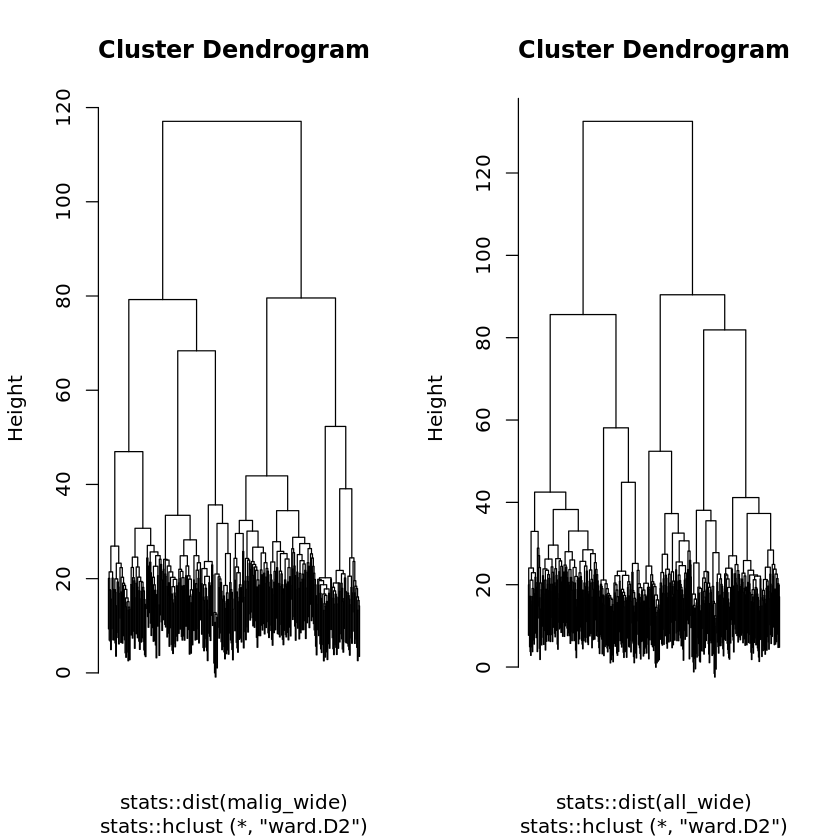

In [22]:
run_slide_cna(so, 
              md, 
              gene_pos,
              plotDir,
              OUTPUT_DIRECTORY,
              spatial=TRUE)

In [23]:
print(so)

An object of class Seurat 
16253 features across 5577 samples within 1 assay 
Active assay: RNA (16253 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 3 dimensional reductions calculated: pca, tsne, umap
